# Unsupervised Learning algorithms - Kmeans Clustering, Agglomerative Clustering, PCA on Online Shoppers Intension dataset and Model Building

### Importing important libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import scipy
from scipy.spatial.distance import pdist,cdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Dataset Analysis :

In [20]:
df = pd.read_csv('online_shoppers_intention_given.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [22]:
print('Rows and columns for the dataset are :',df.shape)

Rows and columns for the dataset are : (12330, 18)


### Checking for null values

In [23]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

It is pretty clear that the columns are free from null values.

### Descriptive Statistics

In [24]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


df.describe() give the count,mean,std,min,25th quantile, mode(5oth quantile),75th quantile and max for every continuous column. The categprical columns are omitted from this.

The statistical inference is extremely useful to know the nature of the raw data.For example, mean and median help us to identify the skewness in the data and hence, lets us know if the data is normally distributed or not.

If the mean is more than median, then the data is right skewed.
If the means is less than median, then the data is left skewed.


## Kmeans clustering :

In [25]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


Looking at the columns above, there are 8 categorical columns and 10 numerical columns. For the best outcome of our model,

    1) Categorical columns can be scaled only after encoding :
       1.1) Weekend and Revenue cannot be label encoded since we don't want any heirarchy based on magnitude.
       1.2) Only month can be label encoded since month having heirarchy based on magnitude is not an issue

    2) Numerical columns ofcourse can be scaled without any encoding needed.


In [26]:
'''
creating 2 dataframes, one for categorical and other for continuous columns. It is not necessary but will help us in 
keeping things clean during encoding and scaling process.
'''

df_category = df[['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue']]
df_numerical = df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated',
                   'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

(1) z-scaling on continous dataframe directly,

In [27]:
from scipy.stats import zscore
df_num_scaled = df_numerical.apply(zscore)

(2) Now,z-scaling on categorical dataframe needs encoding first,

In [28]:
df_category_encoded = pd.get_dummies(df_category[['VisitorType','Weekend', 'Revenue']])

In [29]:
df_category_encoded.head()

,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,False,False,0,0,1
1,False,False,0,0,1
2,False,False,0,0,1
3,False,False,0,0,1
4,True,False,0,0,1


In [30]:
def encoding(x):
    if x == True:
        return 1
    else:
        return 0
    
df_category_encoded['Weekend_encoded'] = df_category_encoded['Weekend'].apply(encoding)
df_category_encoded['Revenue_encoded'] = df_category_encoded['Revenue'].apply(encoding)

In [31]:
df_category_encoded.head()

,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,False,False,0,0,1,0,0
1,False,False,0,0,1,0,0
2,False,False,0,0,1,0,0
3,False,False,0,0,1,0,0
4,True,False,0,0,1,1,0


In [32]:
df_category_encoded = df_category_encoded.drop(['Weekend','Revenue'],axis=1)

In [33]:
df_category_encoded.head()

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,1,0


In [34]:
df_category_scaled =pd.concat((df[['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType']],df_category_encoded),axis=1)
df_category_scaled.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,Feb,1,1,1,1,0,0,1,0,0
1,Feb,2,2,1,2,0,0,1,0,0
2,Feb,4,1,9,3,0,0,1,0,0
3,Feb,3,2,2,4,0,0,1,0,0
4,Feb,3,3,1,4,0,0,1,1,0


(3) Label encoding on month columns is not an issue since months do have a heirarchy,

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_category_scaled['Month'] = le.fit_transform(df_category_scaled['Month'])

In [36]:
df_category_scaled.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,2,1,1,1,1,0,0,1,0,0
1,2,2,2,1,2,0,0,1,0,0
2,2,4,1,9,3,0,0,1,0,0
3,2,3,2,2,4,0,0,1,0,0
4,2,3,3,1,4,0,0,1,1,0


In [37]:
df_scaled_new = pd.concat((df_num_scaled,df_category_scaled),axis=1)
df_scaled_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,1,1,1,1,0,0,1,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,2,1,2,0,0,1,0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,4,1,9,3,0,0,1,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,3,2,2,4,0,0,1,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,3,3,1,4,0,0,1,1,0


In [40]:
num_of_cluster = range(1,15)
inertia_list = []
for i in num_of_cluster:
    model = KMeans(i)
    model.fit(df_scaled_new)
    inertia_list.append(model.inertia_)


In [41]:
table1 = pd.DataFrame({'Number of Clusters':num_of_cluster,'Cluster_error':inertia_list})
print('Table : Cluster error vs Number of clusters : \n')
table1

Table : Cluster error vs Number of clusters : 



,Number of Clusters,Cluster_error
0,1,516905.684753
1,2,356846.498033
2,3,309735.580090
3,4,274358.724729
4,5,256421.166746
5,6,241550.450323
6,7,229323.285714
7,8,220372.864979
8,9,213287.528953
9,10,201006.989558


Inference : Looking at the differences between cluster errors, there is a huge difference in error from K = 1 and K = 2. 
So, we can conclude that optimum no.of clusters is 2.

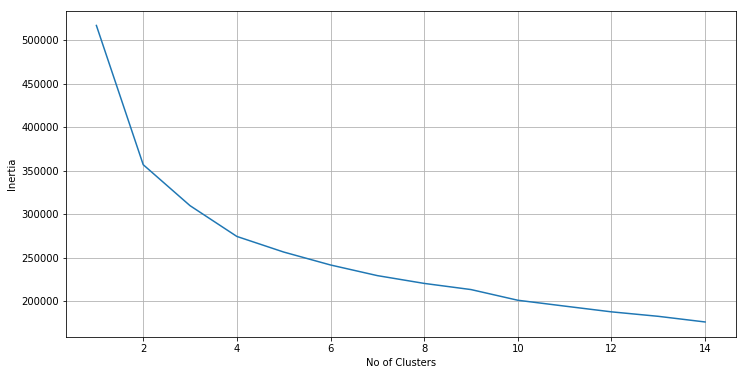

In [42]:
plt.figure(figsize=(12,6))
plt.plot(num_of_cluster, inertia_list)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Inference :
It is clear from the elbow plot, there is a steep change of slope at K = 2, hence the no.of clusters is 2.

In [43]:
km = KMeans(n_clusters=2)
km.fit(df_scaled_new)
centroids_km = km.cluster_centers_
centroids_km_df = pd.DataFrame(centroids_km,columns=df_scaled_new.columns)

In [44]:
centroids_km_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,-0.063215,-0.019048,-0.058834,-0.039885,-0.056131,-0.034413,0.160042,0.157273,0.005756,-0.001098,5.282723,2.398858,2.554498,3.280343,12.006188,0.136126,0.027606,0.836268,0.247501,0.158496
1,0.012984,0.003912,0.012084,0.008192,0.011529,0.007068,-0.032872,-0.032303,-0.001182,0.000226,5.139603,2.067553,2.316551,3.120051,2.439437,0.137648,0.002640,0.859713,0.229543,0.153974


In [45]:
km.labels_[:500]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [46]:
labels_km = km.labels_
labels_km_df = pd.DataFrame({'labels':labels_km})

In [47]:
labels_km_df['labels'].value_counts()

1    10229
0     2101
Name: labels, dtype: int64

In [48]:
g0 = labels_km_df[labels_km_df['labels']==0]
g1 = labels_km_df[labels_km_df['labels']==1]

Through Centroids we can identify which column belongs to which cluster

## Hierarchical Clustering

In [94]:
df_scaled_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded,Revenue_encoded
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,1,1,1,1,0,0,1,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,2,1,2,0,0,1,0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,4,1,9,3,0,0,1,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,3,2,2,4,0,0,1,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,3,3,1,4,0,0,1,1,0


In [95]:
# creating model with complete linkage

model1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

In [96]:
model1.fit(df_scaled_new)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=2, pooling_func='deprecated')

In [97]:
L = pd.DataFrame(model1.labels_)
L[0].value_counts()

0    12327
1        3
Name: 0, dtype: int64

In [98]:
# creating model with single linkage

model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model2.fit(df_scaled_new)

L2 = pd.DataFrame(model2.labels_)
L2[0].value_counts()

0    12329
1        1
Name: 0, dtype: int64

In [99]:
# creating model with ward linkage

model3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model3.fit(df_scaled_new)

L3 = pd.DataFrame(model3.labels_)
L3[0].value_counts()

0    10211
1     2119
Name: 0, dtype: int64

In [100]:
# creating model with average linkage

model4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model4.fit(df_scaled_new)

L4 = pd.DataFrame(model4.labels_)
L4[0].value_counts()

0    12327
1        3
Name: 0, dtype: int64

Inference :  It is quite clear that ward linkage is giving the best clusters out of all the linkages, hence using ward for creating dendogram :

### Dendogram :

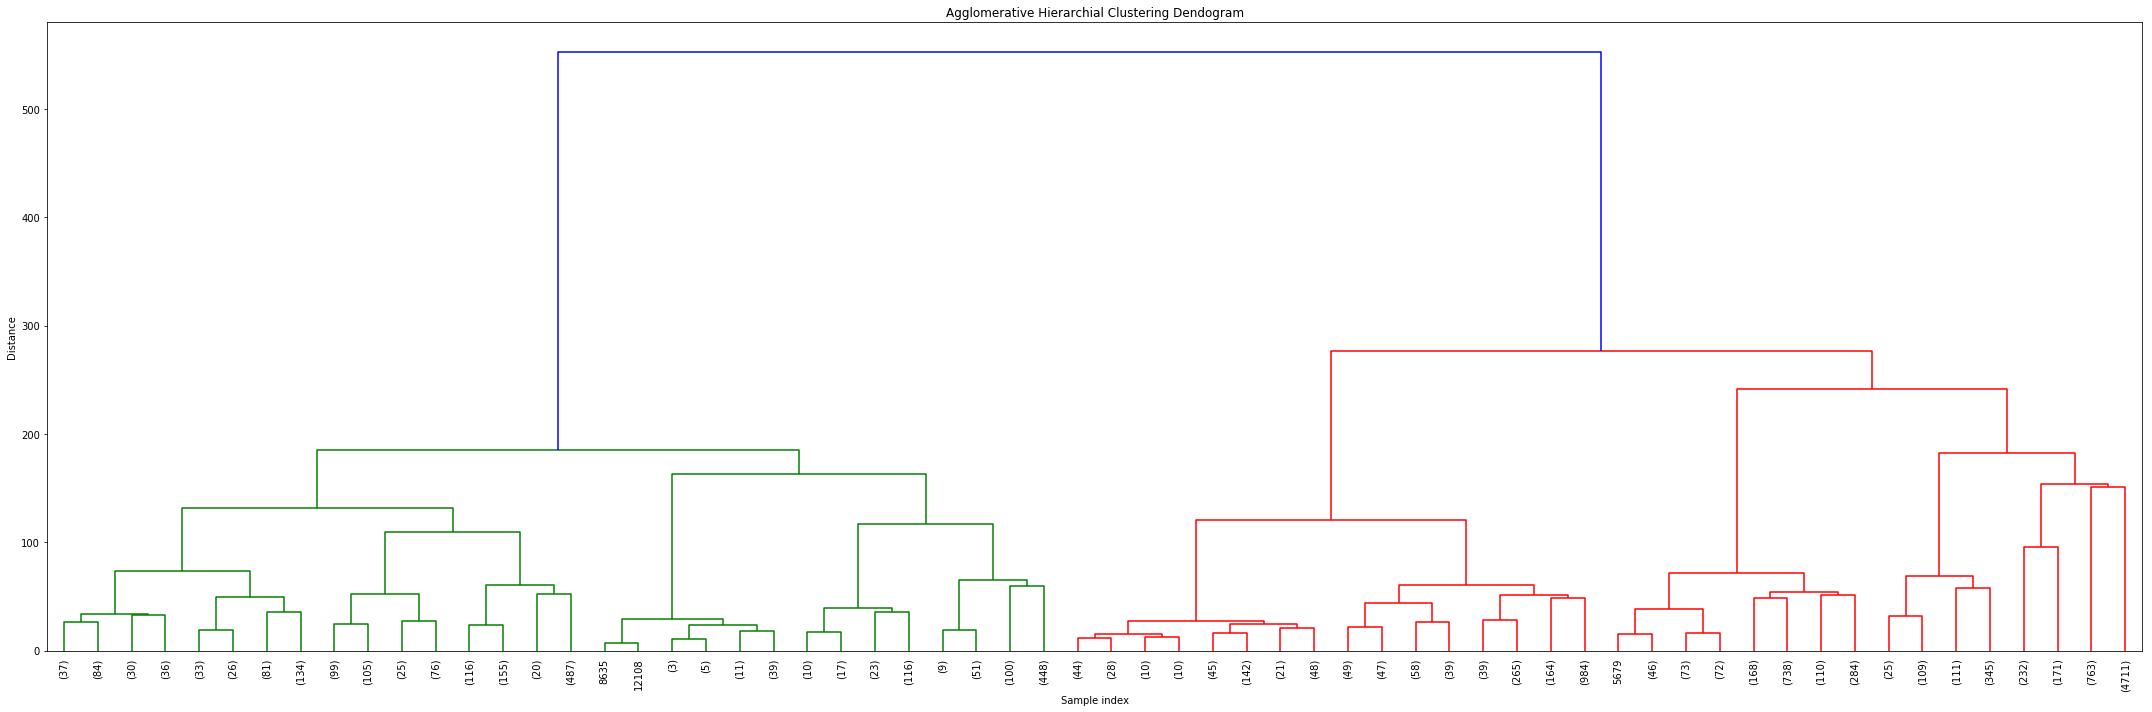

In [53]:
plt.figure(figsize = (30,10))
plt.title('Agglomerative Hierarchial Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled_new.iloc[:,:-1], 'ward')
dendrogram(Z, leaf_rotation = 90.0, p = 5, color_threshold =400,leaf_font_size = 10, truncate_mode = 'level')
plt.tight_layout()

Looking at the dendogram, we can clearly say that there are majorly 2 main clusters or no.of clusters = 2 is the optimum number

### Converting Unsupervised to Supervised : 

In [69]:
df_category_scaled = df_category_scaled.drop('Revenue_encoded',axis=1)
df_original = pd.concat((df_numerical,df_category_scaled),axis=1)
df_labelled_km = pd.concat((df_original,labels_km_df),axis=1)

box plot Administrative


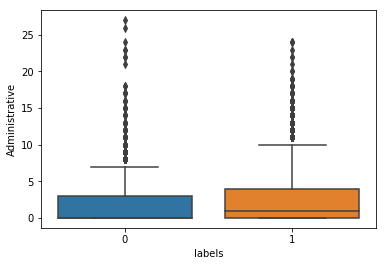

box plot Administrative_Duration


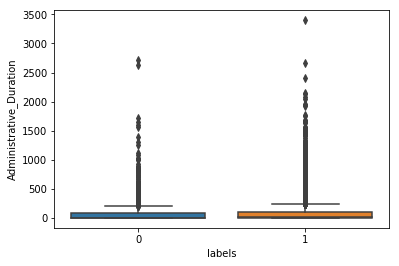

box plot Informational


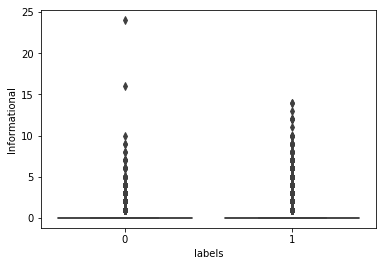

box plot Informational_Duration


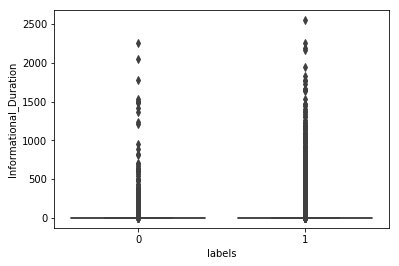

box plot ProductRelated


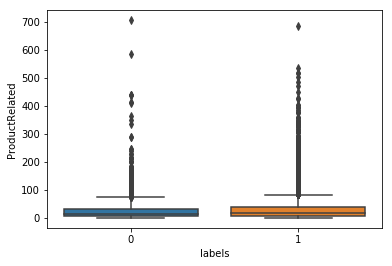

box plot ProductRelated_Duration


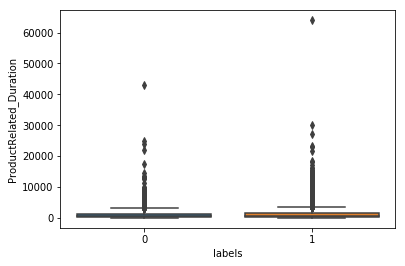

box plot BounceRates


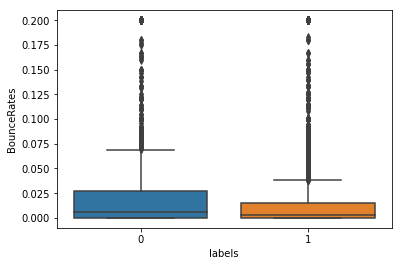

box plot ExitRates


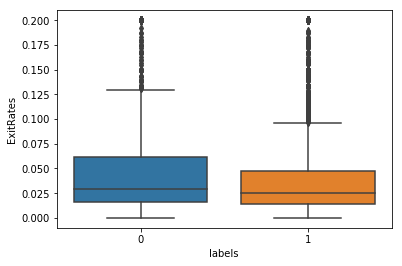

box plot PageValues


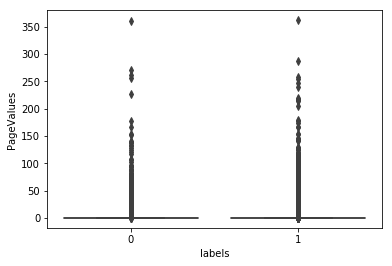

box plot SpecialDay


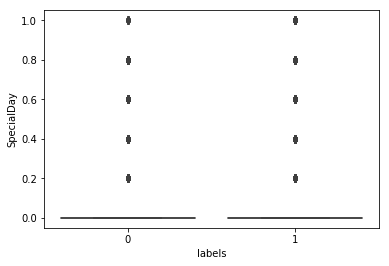

In [70]:
for i in df_numerical:
    sns.boxplot(df_labelled_km['labels'],df_labelled_km[i])
    print('box plot',i)
    plt.show()
    

kde plot Administrative


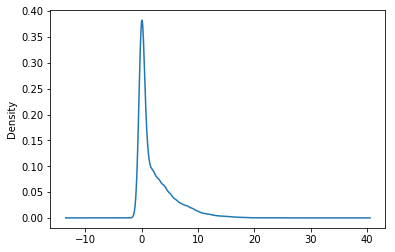

kde plot Administrative_Duration


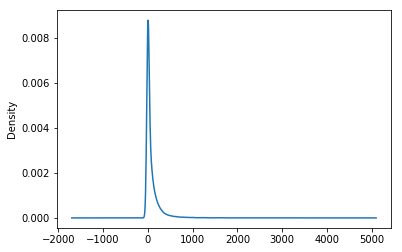

kde plot Informational


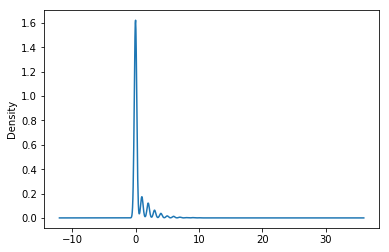

kde plot Informational_Duration


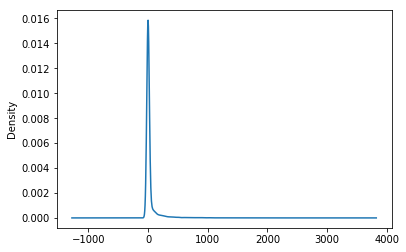

kde plot ProductRelated


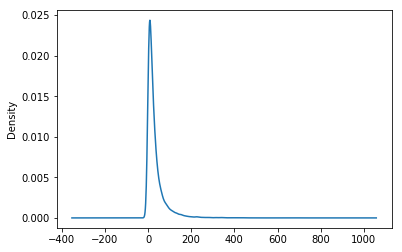

kde plot ProductRelated_Duration


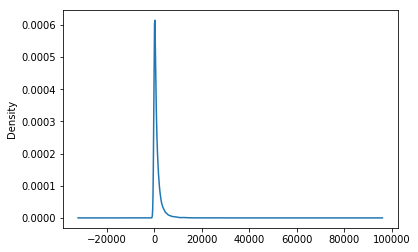

kde plot BounceRates


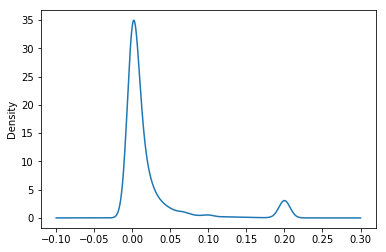

kde plot ExitRates


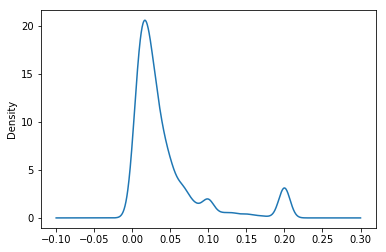

kde plot PageValues


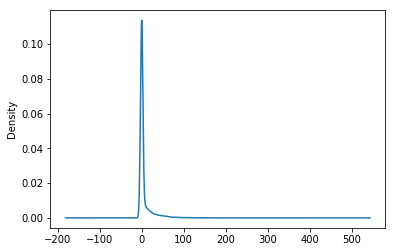

kde plot SpecialDay


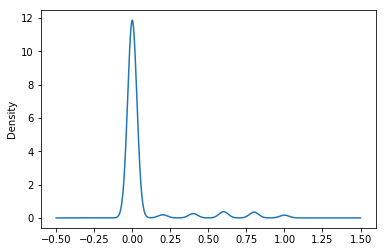

In [71]:
for i in df_numerical:
    df[i].plot(kind='kde')
    print('kde plot',i)
    plt.show()

From box plot we can observe that label 0 has high mean than that of label 1

## PCA

In [72]:
pca = PCA(n_components=0.95)
pca.fit(df_scaled_new)
explained_variance = pca.explained_variance_

In [73]:
print('explained variance', explained_variance)
print('cummulative variance', np.cumsum(explained_variance))

explained variance [16.34181102  5.98730989  5.48270836  3.35658345  2.89060634  1.68023656
  1.07618671  1.01051114  0.95840544  0.92212078  0.75096136]
cummulative variance [16.34181102 22.32912091 27.81182927 31.16841272 34.05901906 35.73925562
 36.81544234 37.82595348 38.78435892 39.7064797  40.45744106]


In [74]:
df_D = pca.transform(df_scaled_new)

In [75]:
kmeans_pca = KMeans(n_clusters=2,n_init=15, random_state=2)
kmeans_pca.fit(df_D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [76]:
kmeans_pca.inertia_

338742.1842920154

In [77]:
df_D_new = pd.DataFrame(df_D,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
df_D_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-3.210353,0.258956,-4.003464,-3.064856,-1.391866,3.524422,0.940385,-0.909076,0.569932,-0.164040,-0.877304
1,-2.248804,0.320235,-3.828641,-1.178557,-0.163228,-0.064939,0.035553,0.160728,-0.135106,-0.300940,0.020112
2,-0.715630,6.620047,0.688954,-2.768961,-2.174365,3.732099,0.769064,-0.941614,0.735146,-0.162813,1.856058
3,-0.125692,1.117378,-3.396786,-1.627833,-0.338311,1.025937,0.259938,-0.161989,0.099270,-0.279076,0.886955
4,-0.174048,0.400033,-3.863743,-0.649847,0.824340,-0.294635,-0.198696,0.117422,-0.060363,-0.418961,0.807354
5,-1.287749,0.245787,-3.817104,-0.559528,-0.196492,-0.715451,-0.250904,0.208086,-0.115884,-0.400459,0.001668
6,-0.875129,2.180993,-2.805886,-3.018320,1.289454,3.941263,-0.178370,-0.548711,0.469642,1.419739,-0.453708
7,0.824141,0.270388,-4.183173,-2.775736,-0.675545,3.491987,1.032178,-0.951078,0.412784,-0.153551,-1.147297
8,-1.150140,0.972570,-3.195067,-1.438482,-0.335049,0.353241,-2.146151,0.844784,-0.159487,2.952675,-0.107681
9,-2.140896,0.499650,-3.670702,-0.624216,1.836528,-0.581264,-1.349087,0.656740,-0.274496,1.222776,-0.271471


In [78]:
labels = kmeans_pca.labels_
df_D_new['labels']=labels
df_D_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,labels
0,-3.210353,0.258956,-4.003464,-3.064856,-1.391866,3.524422,0.940385,-0.909076,0.569932,-0.164040,-0.877304,0
1,-2.248804,0.320235,-3.828641,-1.178557,-0.163228,-0.064939,0.035553,0.160728,-0.135106,-0.300940,0.020112,0
2,-0.715630,6.620047,0.688954,-2.768961,-2.174365,3.732099,0.769064,-0.941614,0.735146,-0.162813,1.856058,0
3,-0.125692,1.117378,-3.396786,-1.627833,-0.338311,1.025937,0.259938,-0.161989,0.099270,-0.279076,0.886955,0
4,-0.174048,0.400033,-3.863743,-0.649847,0.824340,-0.294635,-0.198696,0.117422,-0.060363,-0.418961,0.807354,0


In [79]:
g_kn = df_D_new.groupby('labels')

In [80]:
g0_kn = g_kn.get_group(0)
g1_kn = g_kn.get_group(1)

### Applying hierarchichal to PCA transformed data

In [81]:
df_D_new = df_D_new.drop('labels',axis=1)
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(df_D_new)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [82]:
df_D_new['labels']=agg.labels_
df_D_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,labels
0,-3.210353,0.258956,-4.003464,-3.064856,-1.391866,3.524422,0.940385,-0.909076,0.569932,-0.164040,-0.877304,0
1,-2.248804,0.320235,-3.828641,-1.178557,-0.163228,-0.064939,0.035553,0.160728,-0.135106,-0.300940,0.020112,0
2,-0.715630,6.620047,0.688954,-2.768961,-2.174365,3.732099,0.769064,-0.941614,0.735146,-0.162813,1.856058,0
3,-0.125692,1.117378,-3.396786,-1.627833,-0.338311,1.025937,0.259938,-0.161989,0.099270,-0.279076,0.886955,0
4,-0.174048,0.400033,-3.863743,-0.649847,0.824340,-0.294635,-0.198696,0.117422,-0.060363,-0.418961,0.807354,0


In [83]:
g_agg = df_D_new.groupby('labels')
g0_agg = g_agg.get_group(0)
g1_agg= g_agg.get_group(1)

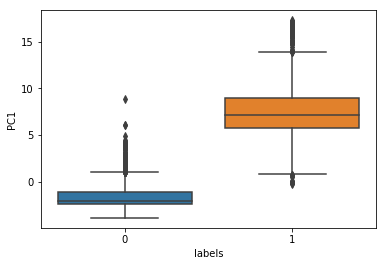

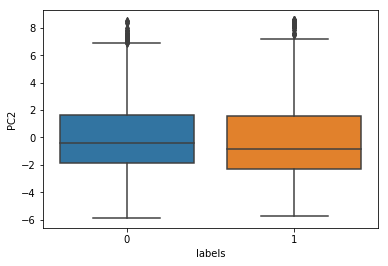

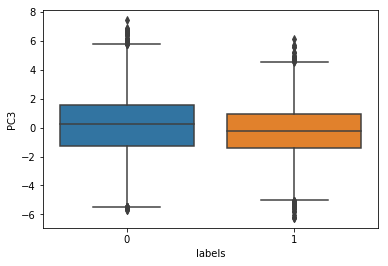

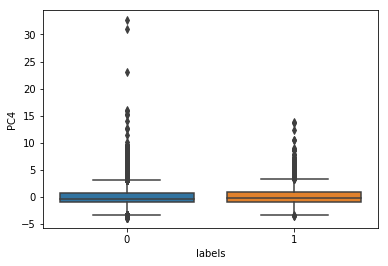

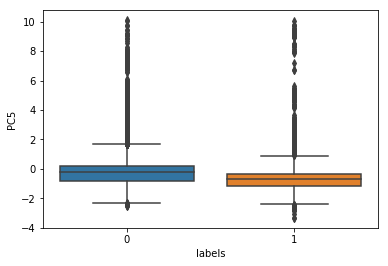

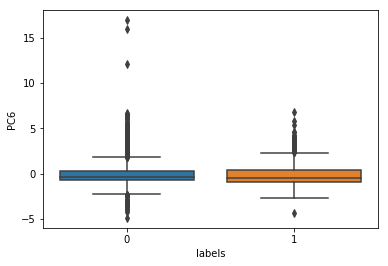

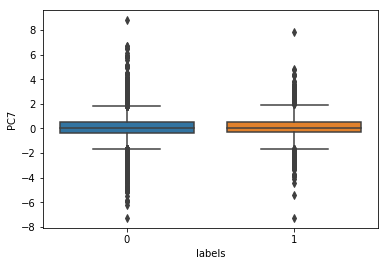

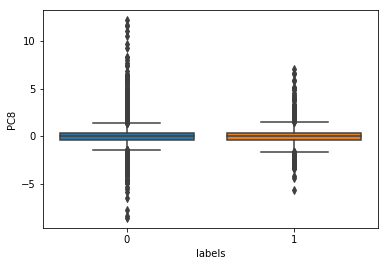

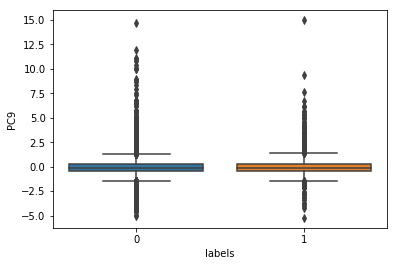

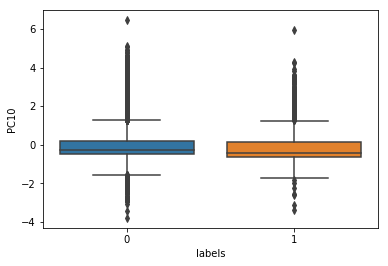

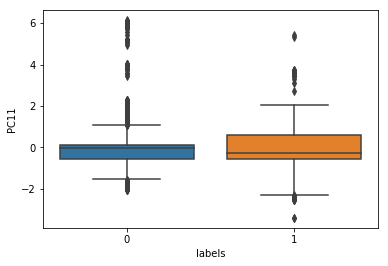

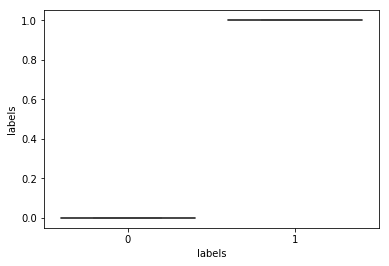

In [84]:
for i in df_D_new.iloc[::-1].columns:
    sns.boxplot(x='labels',y=i,data=df_D_new)
    plt.show()

###  Data Split (without PCA) and model building :

In [86]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [87]:
X= df_scaled_new
y= df_labelled_km['labels']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

### (1) Logistic Regression :

In [101]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
y_pred_LR = model.predict(X_test)
lr_train=model.score(X_train,y_train)
lr_test=accuracy_score(y_test,y_pred)
lr_precision = metrics.precision_score(y_test,y_pred)
lr_recall = metrics.recall_score(y_test,y_pred)
lr_f1 = metrics.f1_score(y_test,y_pred)
lr_roc = metrics.roc_auc_score(y_test,y_pred)

In [102]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       617
           1       1.00      1.00      1.00      3082

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699



### (2) Decision Tree :

In [89]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_train = dt.score(X_train,y_train)
dt_test = accuracy_score(y_test,y_pred_dt)
dt_precision = metrics.precision_score(y_test,y_pred_dt)
dt_recall = metrics.recall_score(y_test,y_pred_dt)
dt_auc = metrics.roc_auc_score(y_test,y_pred_dt)
dt_f1 = metrics.f1_score(y_test,y_pred_dt)
dt_roc = metrics.roc_auc_score(y_test,y_pred_dt)

In [103]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       617
           1       1.00      1.00      1.00      3082

   micro avg       1.00      1.00      1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699



### (3) KNN

In [90]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf = knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
knn_train=model.score(X_train,y_train)
knn_test=accuracy_score(y_test,y_pred_knn)
knn_precision = metrics.precision_score(y_test,y_pred_knn)
knn_recall = metrics.recall_score(y_test,y_pred_knn)
knn_f1 = metrics.f1_score(y_test,y_pred_knn)
knn_roc = metrics.roc_auc_score(y_test,y_pred_knn)

In [104]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       617
           1       1.00      1.00      1.00      3082

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       1.00      1.00      1.00      3699



### (4) Naive Bayes :

In [91]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = knn_clf.predict(X_test)
nb_train = nb.score(X_train,y_train)
nb_test = accuracy_score(y_test,y_pred_nb)
nb_precision = metrics.precision_score(y_test,y_pred_nb)
nb_recall = metrics.recall_score(y_test,y_pred_nb)
nb_f1 = metrics.f1_score(y_test,y_pred_nb)
nb_roc = metrics.roc_auc_score(y_test,y_pred_nb)

In [105]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       617
           1       1.00      1.00      1.00      3082

   micro avg       1.00      1.00      1.00      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       1.00      1.00      1.00      3699



In [130]:
report_without_pca = {'Training accuracy':[lr_train, dt_train, knn_train, nb_train],
           'Precision':[lr_precision, dt_precision, knn_precision, nb_precision],
           'Recall':[lr_recall, dt_recall, knn_recall, nb_recall],
           'Test_score':[lr_test, dt_test, knn_test, nb_test],
            'f1_score':[lr_f1,dt_f1,knn_f1,nb_f1],
            'roc_curve':[lr_roc,dt_roc,knn_roc,nb_roc]
           }

In [131]:
report1_df = pd.DataFrame(report_without_pca, index = ['Logistic Regression','Decision Tree','KNN','NaiveBayes'])
report1_df

,Training accuracy,Precision,Recall,Test_score,f1_score,roc_curve
Logistic Regression,0.988182,0.960128,0.945055,0.983779,0.952532,0.968445
Decision Tree,0.992469,0.946625,0.946625,0.981617,0.946625,0.967760
KNN,0.988182,0.984252,0.981162,0.994052,0.982704,0.988948
NaiveBayes,0.978681,0.984252,0.981162,0.994052,0.982704,0.988948


#### Inference :

    1) Through metrices we have identified that Decision Tree is the best model. But, as we know Decision Tree is an over fitting model.

    2) Logistic Regression has more area under ROC curve.

    3) The test and train scores are also very similar in logistic regression

    4) Precision and Recall are highest for Decision Tree

    5) Precision and Recall are similar for all other models

    6) f1 score is highest for Decision Tree. 

### Data Split (with PCA) and model building :

In [106]:
X = df_D_new.drop('labels',axis=1)
y = df_D_new['labels']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

### (1) Logistic Regression :

In [107]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
y_pred = model.predict(X_test)
lr_train=model.score(X_train,y_train)
lr_test=accuracy_score(y_test,y_pred)
lr_precision = metrics.precision_score(y_test,y_pred)
lr_recall = metrics.recall_score(y_test,y_pred)
lr_f1 = metrics.f1_score(y_test,y_pred)
lr_roc = metrics.roc_auc_score(y_test,y_pred)

### (2) Decision Tree :

In [108]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_train = dt.score(X_train,y_train)
dt_test = accuracy_score(y_test,y_pred_dt)
dt_precision = metrics.precision_score(y_test,y_pred_dt)
dt_recall = metrics.recall_score(y_test,y_pred_dt)
dt_auc = metrics.roc_auc_score(y_test,y_pred_dt)
dt_f1 = metrics.f1_score(y_test,y_pred_dt)
dt_roc = metrics.roc_auc_score(y_test,y_pred_dt)

### (3) KNN

In [109]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf = knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
knn_train=model.score(X_train,y_train)
knn_test=accuracy_score(y_test,y_pred_knn)
knn_precision = metrics.precision_score(y_test,y_pred_knn)
knn_recall = metrics.recall_score(y_test,y_pred_knn)
knn_f1 = metrics.f1_score(y_test,y_pred_knn)
knn_roc = metrics.roc_auc_score(y_test,y_pred_knn)

### (4) Naive Bayes :

In [110]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = knn_clf.predict(X_test)
nb_train = nb.score(X_train,y_train)
nb_test = accuracy_score(y_test,y_pred_nb)
nb_precision = metrics.precision_score(y_test,y_pred_nb)
nb_recall = metrics.recall_score(y_test,y_pred_nb)
nb_f1 = metrics.f1_score(y_test,y_pred_nb)
nb_roc = metrics.roc_auc_score(y_test,y_pred_nb)

In [135]:
report_after_pca = {'Training accuracy':[lr_train, dt_train, knn_train, nb_train],
           'Precision':[lr_precision, dt_precision, knn_precision, nb_precision],
           'Recall':[lr_recall, dt_recall, knn_recall, nb_recall],
           'Test_score':[lr_test, dt_test, knn_test, nb_test],
            'f1_score':[lr_f1,dt_f1,knn_f1,nb_f1],
            'roc_curve':[lr_roc,dt_roc,knn_roc,nb_roc]
           }

In [136]:
report2_df = pd.DataFrame(report_after_pca, index = ['Logistic_Regression-pca','Decision_Tree-pca','KNN-pca','NaiveBayes-pca'])
report2_df

,Training accuracy,Precision,Recall,Test_score,f1_score,roc_curve
Logistic_Regression-pca,0.988182,0.960128,0.945055,0.983779,0.952532,0.968445
Decision_Tree-pca,0.992469,0.946625,0.946625,0.981617,0.946625,0.967760
KNN-pca,0.988182,0.984252,0.981162,0.994052,0.982704,0.988948
NaiveBayes-pca,0.978681,0.984252,0.981162,0.994052,0.982704,0.988948


Train and Test score are logistic regression since the value is very close

Decision Tree and KNN have better score but slightly under fitting and over fitting models.

f1 score is similar for KNN and Naive Bayes

roc_curve is similar and highest for KNN and Naive Bayes

Precision and Recall is also high for KNN and Naive Bayes

Connsidering all the score, we can choose between KNN and Naive Bayes.

##  Final Model : 

In [137]:
Final_Score = pd.concat((report1_df,report2_df),axis=0)
Final_Score

,Training accuracy,Precision,Recall,Test_score,f1_score,roc_curve
Logistic Regression,0.988182,0.960128,0.945055,0.983779,0.952532,0.968445
Decision Tree,0.992469,0.946625,0.946625,0.981617,0.946625,0.967760
KNN,0.988182,0.984252,0.981162,0.994052,0.982704,0.988948
NaiveBayes,0.978681,0.984252,0.981162,0.994052,0.982704,0.988948
Logistic_Regression-pca,0.988182,0.960128,0.945055,0.983779,0.952532,0.968445
Decision_Tree-pca,0.992469,0.946625,0.946625,0.981617,0.946625,0.967760
KNN-pca,0.988182,0.984252,0.981162,0.994052,0.982704,0.988948
NaiveBayes-pca,0.978681,0.984252,0.981162,0.994052,0.982704,0.988948


#### Inference :

1)If we see all the metrices, DECISION TREE before PCA has highest and better scores.

2)Taking other models into consideration, the area under ROC curve has been maximum for Logistic Regression before PCA. Then, KNN and Naive bayes before PCA and then KNN and Naive Bayes after performing PCA.

3)f1 score has been high for Logistic Regression before PCA and followed by KNN and Naive Bayes before and after performing the PCA

4)Test and Train accuracy has been very much close for logistic regression.

5)Precision and Recall has been highest for Logistic Regresion before PCA.

6)Considering all the metrices and scores,Logistic Regression before PCA performs the best among all.